In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import os

# #I have imported and used functions from the previous files uploaded in this repository. Many functions are required 
# #for many further implementations and further calculations. 
import rolling_stats as rs
import norm_dist as nd
import nature_of_daily_returns as nds

pd.options.display.float_format = '{:.5f}'.format

In [15]:
def get_data_close(symbol):
    stock = yf.Ticker(symbol)
    df = stock.history(period="max")
    return pd.DataFrame(df['Close'])

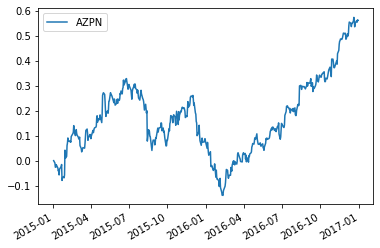

               AZPN
2015-01-02  0.00000
2015-01-05 -0.00942
2015-01-06 -0.02599
2015-01-07 -0.02627
2015-01-08 -0.01599


In [7]:
# def norm_dist_yearwise(symbol, dates, plot=False):

    '''
    This function first slices out the daterange provided and then uses the first value at the 0th row of the new sliced dataframe as the normalizing value and then 
    normalizes the entire ditribution based on that and then plots it. 
    This function accepts the list of stocks and the date range of the required plot. 
    '''

'''
Sample Run
dates = pd.date_range('2015-01-01','2017-01-01')
print(nd.norm_dist_yearwise('AZPN', dates, True).head())
'''


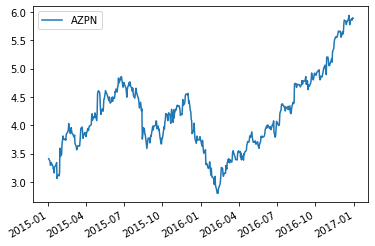

              AZPN
2015-01-02 3.41058
2015-01-05 3.36902
2015-01-06 3.29597
2015-01-07 3.29471
2015-01-08 3.34005


In [8]:
# def norm_dist(symbol, dates, plot = False):
    '''    
    This function treats the first ever recorded stock price to be the initial value and the rest of the ditribution is accordingly normalized. Then the selected date 
    range is sliced out and the plot is shown. 
    This function accepts the list of stocks and the date range of the required plot. 
    '''
'''
Sample Run
dates =pd.date_range('2015-01-01','2017-01-01')
print(nd.norm_dist('AZPN', dates, True).head())
''''''

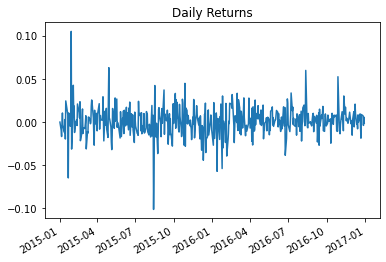

            Daily Return
2015-01-02       0.00000
2015-01-05      -0.00942
2015-01-06      -0.01672
2015-01-07      -0.00029
2015-01-08       0.01056


In [9]:
# def daily_return(symbol, dates, plot= False):
    '''
    This function returns or plots the daily returns of a given stock for a given time period. 
    This function accepts 3 parameters. df - the historic dataframe of the stock, date- the daterange for the plot, plot - a boolean for
    whether the user wnats to see the plot or just wants the resulting dataframe.  
    '''
'''
Sample Run

dates =pd.date_range('2015-01-01','2017-01-01')
print(rs.daily_return('AZPN', dates, True).head())
'''

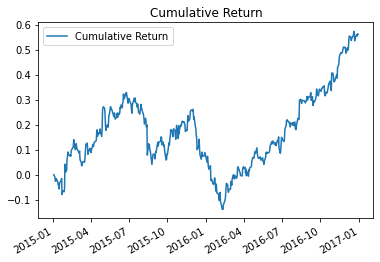

            Cumulative Return
2015-01-02            0.00000
2015-01-05           -0.00942
2015-01-06           -0.02599
2015-01-07           -0.02627
2015-01-08           -0.01599


In [10]:
# def cumulative_return(symbol,dates ,plot=False):
    '''
    This function calculates the bollinger bands for the given stock in the given time period. These bands are powerful indicators for 
    making the decision for selling and buying. This should not be your only indicator but it certainly helps to visualize the data and trends.
    The upper bound is mean+2*std and the lower bound is mean-2*std. These lines are plotted on the graph along with the prices. 
    The rolling mean and rolling std is calculated for the past 20 days. 
    '''


'''
Sample Run

dates =pd.date_range('2015-01-01','2017-01-01')
print(rs.cumulative_return('AZPN', dates, True).head())
'''


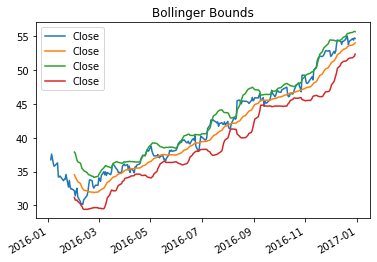

In [12]:
# def bollinger_bands(symbol, dates , rolling_range = 20):
    ''' 
    This function calculates the bollinger bands for the given stock in the given time period. These bands are powerful indicators for 
    making the decision for selling and buying. This should not be your only indicator but it certainly helps to visualize the data and trends.
    The upper bound is mean+2*std and the lower bound is mean-2*std. These lines are plotted on the graph along with the prices. 
    The rolling mean and rolling std is calculated for the past 20 days by default but can be changed. 
    '''

    
'''
Sample Run

dates =pd.date_range('2016-01-01','2017-01-01')
rs.bollinger_bands("AZPN", dates)
'''


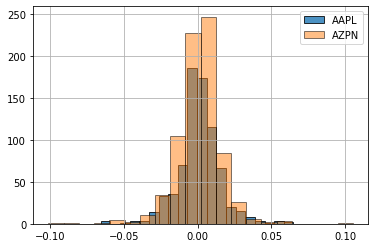

In [16]:
# def plot_hist_with_stats(stocks, dates, m = False, bins = 20):
    '''
    This function is useful for plotting histograms for one or more than one stock at a time. 
    This function takes in a list of stock symbols , the range of dates, whether to plot the mean of the stock or not. Default value is False.
    This function also takes in the number of bins required in the histogram, the default value is 20. 
    '''

'''
Sample Run

dates = pd.date_range('2015-01-01','2017-12-31')
nds.plot_hist_with_stats(['AAPL', 'AZPN'], dates)
'''


Correlation of  MSFT  and  AZPN  is: 
0.346826075210316


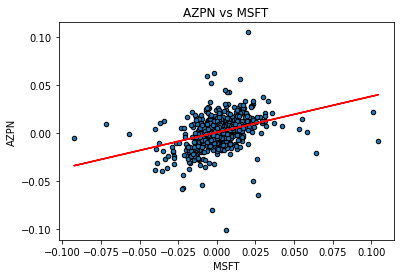

Correlation of  AAPL  and  GOOGL  is: 
0.4257518840170452


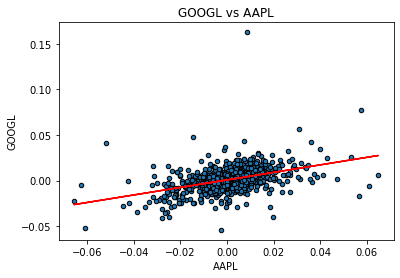

In [17]:
# def plot_scatter(stocks, dates):
    '''
    This function takes in a list of pair of stocks between which the alpha and beta is to be found and a line of best fit is to be plotted.
    The daily returns of both the stocks are calculated from the function from rolling_stats.py and then graphed against each other. This 
    function is mainly used to plot any stock against the S&P 500 or Dow Jones Index stocks to get a sens eof how well the stock is 
    doing with respect to the market and how reactive it is to the market movements. 
    This function accepts 2 para,eters : stocks - A list of lists of size 2, dates - The daterange for the scatter plot.
    '''

'''
Sample run

dates = pd.date_range('2015-01-01','2017-12-31')
nds.plot_scatter([['MSFT', "AZPN"], ['AAPL', 'GOOGL']], dates)
'''



In [18]:
# def portfolio_val(portfolio , comp, dates , val, plot=False):
#     '''
#     This function takes in 
#     portfolio : a list of stocks in the portfolio
#     comp : a list of composition of the portfolio
#     dates : The range of date for which the request is to be observed
#     val : The starting value of the portfolio at the start date in the date range
#     plot : Whether you want to see the plot of daily returns and price

#     This function returns a dataframe that has the value of each stock adjusted ny composition over the daterange, daily returns and 
#     value of the portfolio, and a stats_dic which has the mean and std of the daily returns and the cumilative return over the 
#     given date range. 
#     '''
#     df_norm  = pd.DataFrame(index = dates)
#     for s in portfolio:
#         df_temp = nd.norm_dist_yearwise(s, dates)
#         df_norm = df_norm.join(df_temp)
#         df_norm.dropna(inplace= True)
#     df_norm = df_norm*comp*val
#     df_norm['Value'] = df_norm.sum(axis=1)
#     print(df_norm.head())
#     df_daily = rs.daily_return(df_norm, "Value", dates)
#     df_daily = (df_norm['Value'][1:]/df_norm['Value'][:-1].values)-1
#     df_daily.iloc[0] = 0
#     print(df_daily.head())
    
    
# portfolio = ['MSFT', 'AZPN', 'NFLX', 'GOOGL']
# composition = [0.4 , 0.4, 0.1, 0.1]
# dates =pd.date_range('2017-01-01','2018-01-01')
# start_val = 1000000
# portfolio_val(portfolio, composition , dates, start_val)